### CITIBIKE ANALYSIS PROJECT


#### Libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import plotly.express as px

#display the graphs
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

### Reading Dataset


In [2]:
#read the csv file into a dataframe
geo_df = pd.read_csv('/Users/drushti/Documents/PythonProject/CitiBike/geo_df.csv')
geo_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zip_start,zip_end
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,Friday,Friday,18,18,August,6.63,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7302
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,...,Friday,Friday,1,1,August,9.52,POINT (-74.02778059244156 40.73698221818716),549.0,7030,7030
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,Sunday,Sunday,13,13,August,10.13,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7302
3,8F11D340492FCD32,electric_bike,2022-08-04 22:02:12,2022-08-04 22:21:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Pershing Field,JC024,40.736982,-74.027781,...,Thursday,Thursday,22,22,August,19.32,POINT (-74.02778059244156 40.73698221818716),549.0,7030,7307
4,48FF219B87E90004,electric_bike,2022-08-08 14:02:48,2022-08-08 14:16:11,Columbus Drive,JC014,Fairmount Ave,JC093,40.718355,-74.038914,...,Monday,Monday,14,14,August,13.38,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7306


#### BIKE RIDERS MONTHLY TRIP COUNT AND AVERAGE TRIP DURATION

#### COUNT PLOT FOR MONTHLY BIKE TRIPS

In [3]:
#COUNT OF USER TYPE OF EACH MONTH
UT_Montht = pd.DataFrame(geo_df.groupby('member_casual')['month'].value_counts())
#UT_Montht.sort_values(by='count',ascending=False,inplace=True)
UT_Montht

count
member_casual month           
casual        August     41451
              September  35526
              July       31750
              October    27201
              June       26750
              May        25374
              April      21111
              November   19422
              March      13271
              January    11950
              December   11409
              February    9780
member        July       70952
              August     69290
              May        66844
              June       66764
              September  64754
              October    59213
              April      56451
              November   50869
              March      47132
              January    41947
              February   39353
              December   35331

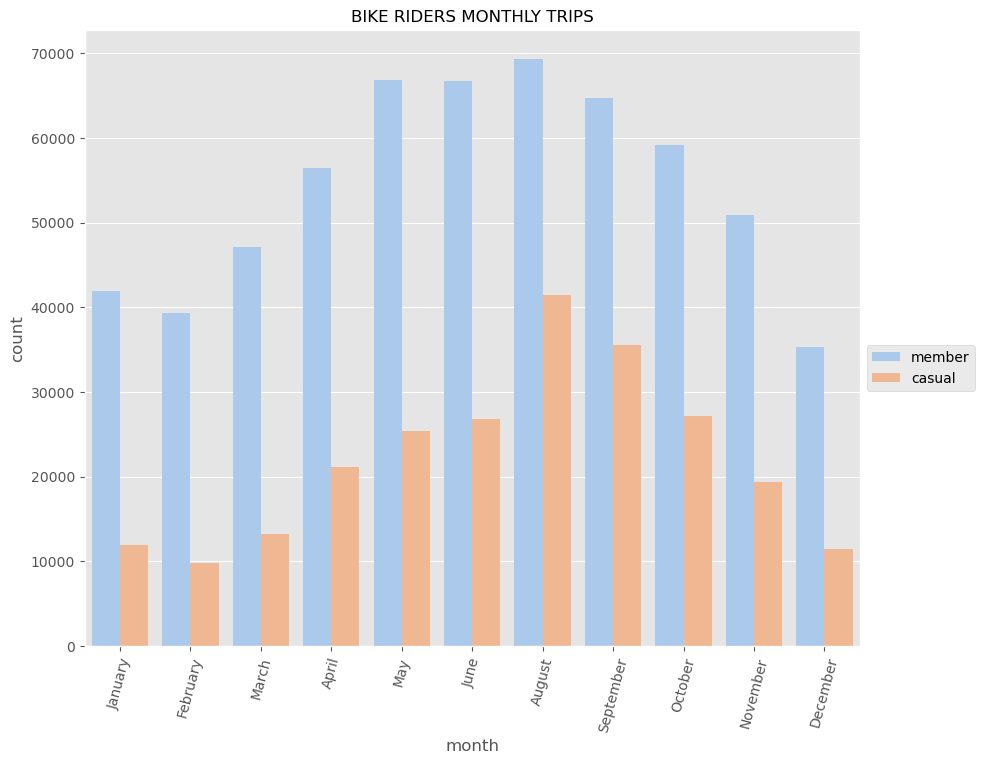

In [4]:
#size of the plot
plt.figure(figsize = (10, 8))

#title of graph
plt.title('BIKE RIDERS MONTHLY TRIPS',fontsize=12)

#create the pie chart
sns.countplot(geo_df, x="month", order=['January','February','March','April','May','June','August','September','October','November','December'],
              hue="member_casual",hue_order=['member','casual'],palette='pastel')

#display legend
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=75)

#display the graph
plt.show()

#### LINE PLOT TRIP DURATION

In [5]:
Month_TD = pd.DataFrame(geo_df.groupby(['member_casual','month'],as_index=False)['tripduration'].mean())
Month_TD = np.round(Month_TD.sort_values(by='tripduration',ascending=False),2)
Month_TD

,member_casual,month,tripduration
1,casual,August,14.72
8,casual,May,14.54
0,casual,April,14.05
5,casual,July,13.95
6,casual,June,13.76
11,casual,September,13.20
10,casual,October,11.81
9,casual,November,11.22
7,casual,March,11.21
4,casual,January,10.38


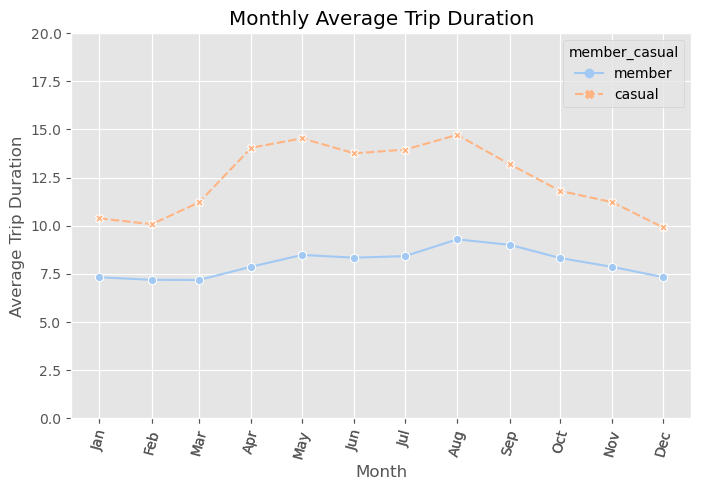

In [6]:
Month_TD['month'] = pd.to_datetime(Month_TD['month'], format='%B') # Adjust the format as per your data
# Sort the DataFrame by 'month'
Month_TD.sort_values(by='month', inplace=True)

#size of line graph
plt.figure(figsize = (8,5))

#create line graph
sns.lineplot(data=Month_TD, x='month', y='tripduration',hue='member_casual',style='member_casual',markers=True,dashes=True,palette='pastel')

#title of the graph
plt.title('Monthly Average Trip Duration')

#label of graph
plt.xlabel('Month')
plt.ylabel('Average Trip Duration')

#set axis
plt.ylim((0,20))
plt.xticks(rotation = 75)

# Set x-ticks to display abbreviated month names
plt.xticks(Month_TD['month'], Month_TD['month'].dt.strftime('%b'), rotation=75)

#display the graph
plt.show()



#### BOX PLOT TRIP DUTRATION

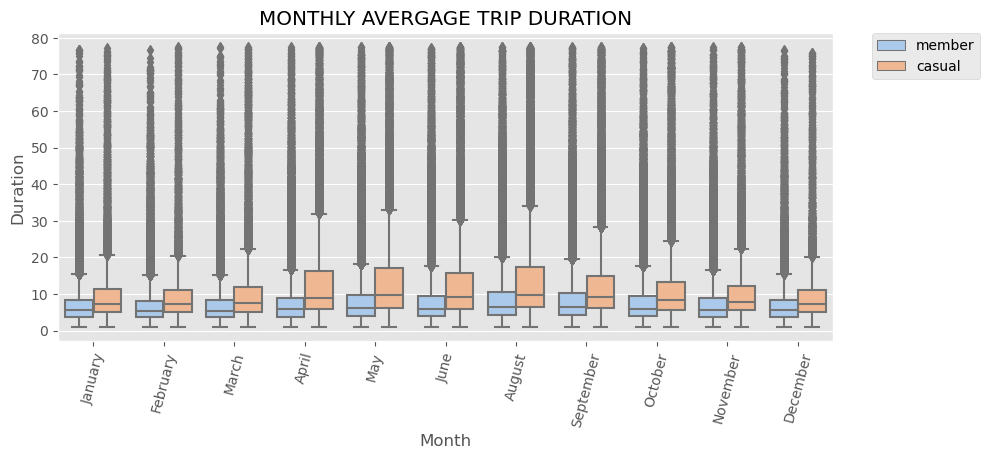

In [7]:
### Box Plot

#size of line graph
plt.figure(figsize = (10,4))

#create line graph
sns.boxplot(data=geo_df, x='month', y='tripduration',order=['January','February','March','April','May','June','August','September','October','November','December'],
            hue='member_casual',palette='pastel')

#title of the graph
plt.title('MONTHLY AVERGAGE TRIP DURATION')

#label of graph
plt.xlabel('Month')
plt.ylabel('Duration')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#set axis
#plt.ylim((0,50))
plt.xticks(rotation = 75)

#display the graph
plt.show()

#### BIKE RIDERS WEEKLY TRIP COUNT AND AVERAGE TRIP DURATION

#### BAR PLOT FOR WEEKLY TRIP COUNTS

In [8]:
# group total trip count by day of the week
trip_day = geo_df.groupby(['member_casual','startweekday'],as_index = False)[['starttime']].count()
trip_day.columns = ['user_type','day','count']
trip_day


,user_type,day,count
0,casual,Friday,41761
1,casual,Monday,31622
2,casual,Saturday,52901
3,casual,Sunday,46319
4,casual,Thursday,37042
5,casual,Tuesday,31015
6,casual,Wednesday,34335
7,member,Friday,99876
8,member,Monday,97594
9,member,Saturday,80286


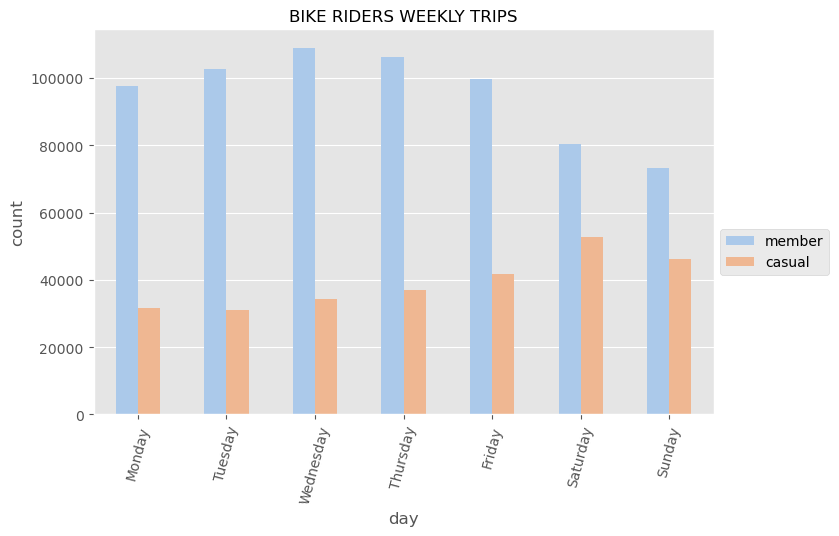

In [9]:
#size of the plot
plt.figure(figsize = (8,5))

#Title of the graph
plt.title('BIKE RIDERS WEEKLY TRIPS',fontsize=12)

#create the bar plot
sns.barplot(trip_day, x="day",y='count',hue='user_type',hue_order=['member','casual'],
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            width=0.5,dodge=True,palette='pastel')

#display legend
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=75)
#display the graph
plt.show()


#### LINE PLOT TRIP DURATION

In [10]:
Day_TD = pd.DataFrame(geo_df.groupby(['member_casual','startweekday'],as_index=False)['tripduration'].mean())
Day_TD = np.round(Day_TD.sort_values(by='tripduration',ascending=False),2)
Day_TD

,member_casual,startweekday,tripduration
3,casual,Sunday,15.54
2,casual,Saturday,14.44
1,casual,Monday,12.92
0,casual,Friday,12.14
5,casual,Tuesday,11.68
6,casual,Wednesday,11.48
4,casual,Thursday,11.43
10,member,Sunday,9.58
9,member,Saturday,9.23
7,member,Friday,8.02


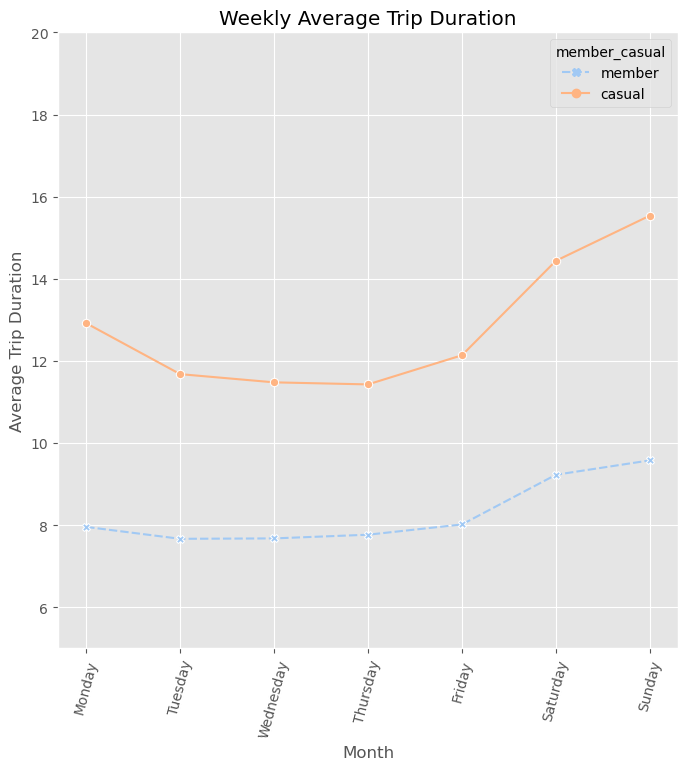

In [11]:
#size of line graph
plt.figure(figsize = (8,8))
# Map of weekdays to their respective order
weekday_order = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

Day_TD['weekday_order'] = Day_TD['startweekday'].map(weekday_order)

# Sort the DataFrame by the new column
Day_TD.sort_values(by='weekday_order', inplace=True)


#create line graph
sns.lineplot(data=Day_TD, x='startweekday', y='tripduration',hue='member_casual',hue_order=['member','casual'],style='member_casual',markers=True,dashes=True,palette='pastel')

#title of the graph
plt.title('Weekly Average Trip Duration')

#label of graph
plt.xlabel('Month')
plt.ylabel('Average Trip Duration')

#set axis
plt.ylim((5,20))
plt.xticks(rotation = 75)

#display the graph
plt.show()



#### BOX PLOT TRIP DURATION

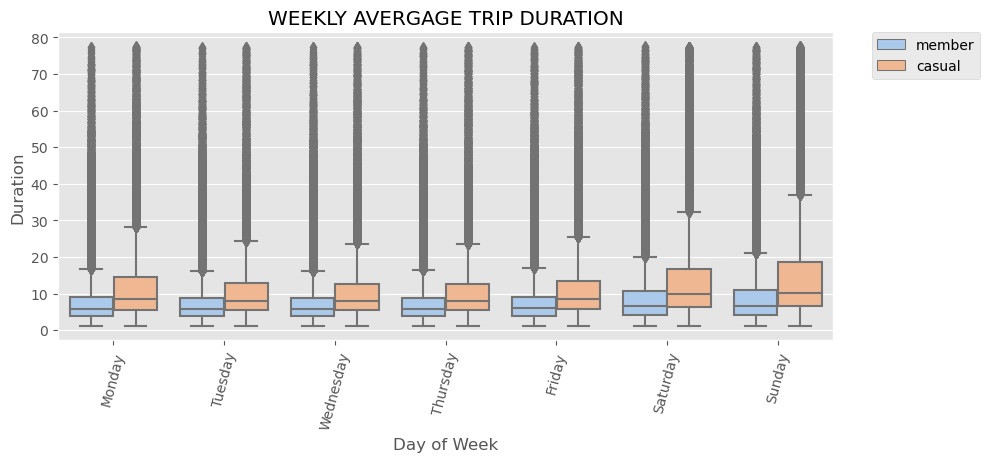

In [12]:
### Box Plot

#size of line graph
plt.figure(figsize = (10,4))

#create line graph
sns.boxplot(data=geo_df, x='startweekday', y='tripduration',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            hue='member_casual',palette='pastel')

#title of the graph
plt.title('WEEKLY AVERGAGE TRIP DURATION')

#label of graph
plt.xlabel('Day of Week')
plt.ylabel('Duration')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#set axis
#plt.ylim((0,50))
plt.xticks(rotation = 75)

#display the graph
plt.show()

#### BIKE RIDERS HOURLY TRIP COUNT AND AVERAGE TRIP DURATION

In [13]:
# group trip counts by hour of day
trip_hr = pd.DataFrame(geo_df.groupby(['member_casual','starttime'],as_index=False)['started_at'].count())
trip_hr.columns = ['user_type','time','count']
trip_hr


,user_type,time,count
0,casual,0,5123
1,casual,1,3779
2,casual,2,2314
3,casual,3,1330
4,casual,4,1104
5,casual,5,1974
6,casual,6,4187
7,casual,7,7042
8,casual,8,10118
9,casual,9,9754


#### BAR PLOT FOR WEEKLY TRIP COUNTS

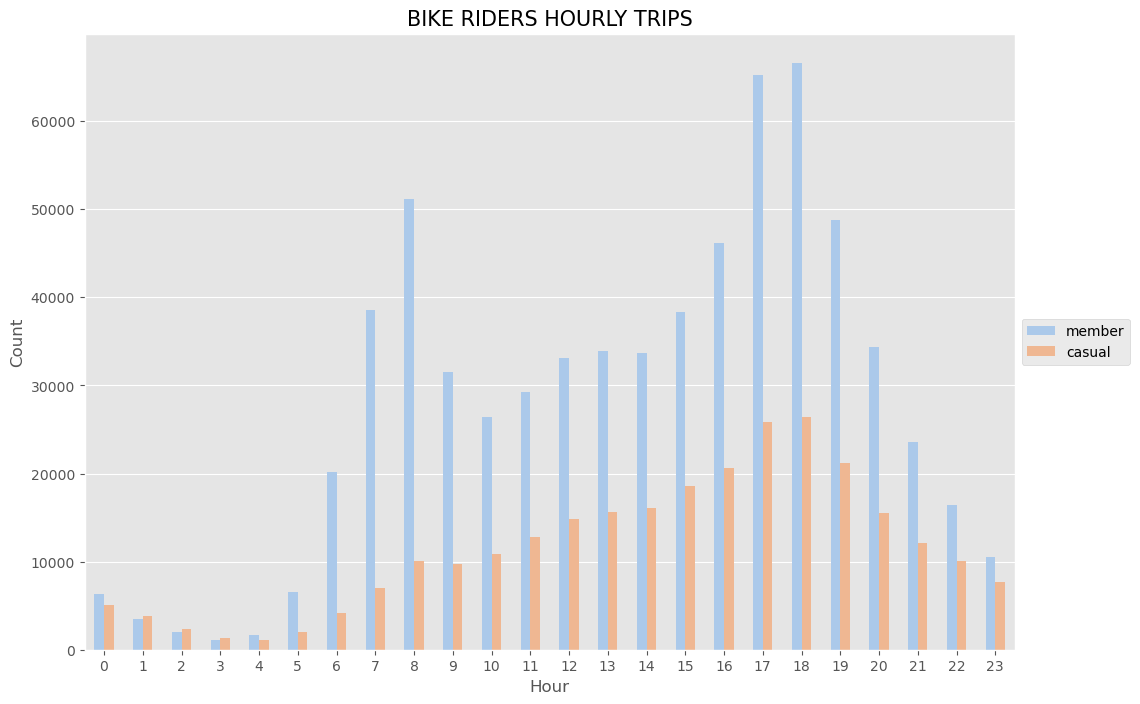

In [14]:
#size of the plot
plt.figure(figsize = (12,8))

#Title of the graph
plt.title('BIKE RIDERS HOURLY TRIPS',fontsize=15)

#create the bar plot
sns.barplot(trip_hr, x="time",y='count',hue='user_type',width=0.5,dodge=True,palette='pastel',hue_order=['member','casual'])

#label of graph
plt.xlabel('Hour')
plt.ylabel('Count')

#display legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#display the graph
plt.show()


#### LINE PLOT TRIP DURATION

In [15]:
Hourly_TD = pd.DataFrame(geo_df.groupby(['member_casual','starttime'],as_index=False)['tripduration'].mean())
Hourly_TD = np.round(Hourly_TD,2)
Hourly_TD

,member_casual,starttime,tripduration
0,casual,0,13.79
1,casual,1,13.57
2,casual,2,13.28
3,casual,3,12.58
4,casual,4,9.79
5,casual,5,7.65
6,casual,6,7.74
7,casual,7,8.48
8,casual,8,9.67
9,casual,9,11.18


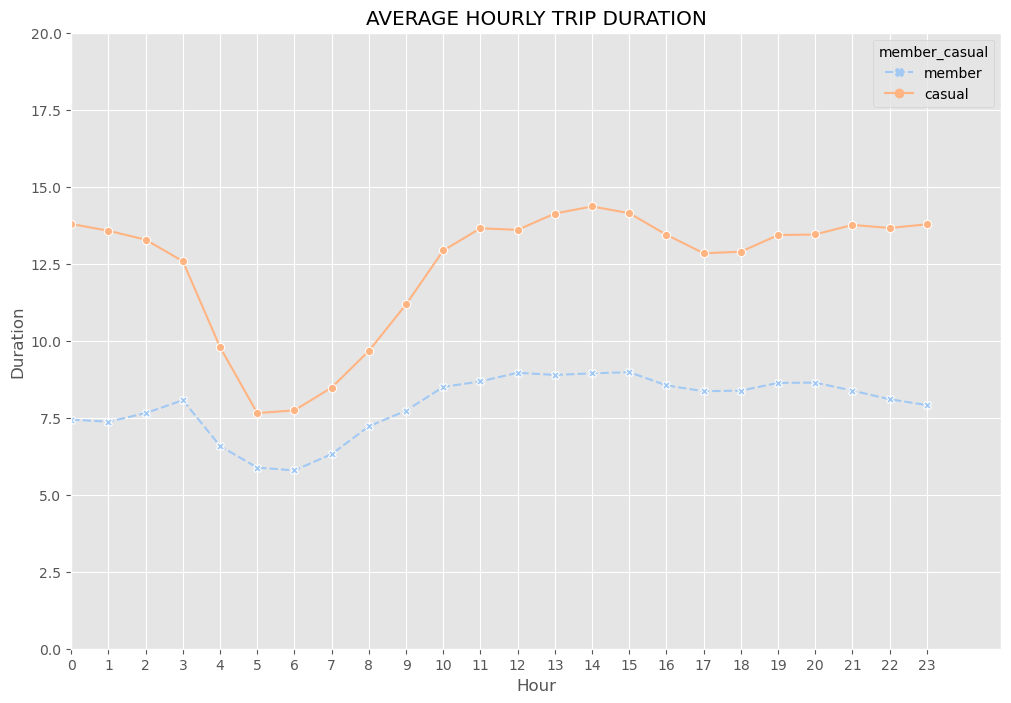

In [16]:
#size of line graph
plt.figure(figsize = (12,8))

x = np.arange(24)
#create line graph
sns.lineplot(data=Hourly_TD,x='starttime',y='tripduration',hue='member_casual',hue_order=['member','casual'],
             style='member_casual',markers=True,dashes=True,palette='pastel')

#title of the graph
plt.title('AVERAGE HOURLY TRIP DURATION')

#label of graph
plt.xticks(x)
plt.xlabel('Hour')
plt.ylabel('Duration')

#set axis
plt.ylim((0,20))
plt.xlim((0,25))

#display the graph
plt.show()


#### BOX PLOT TRIP DURATION

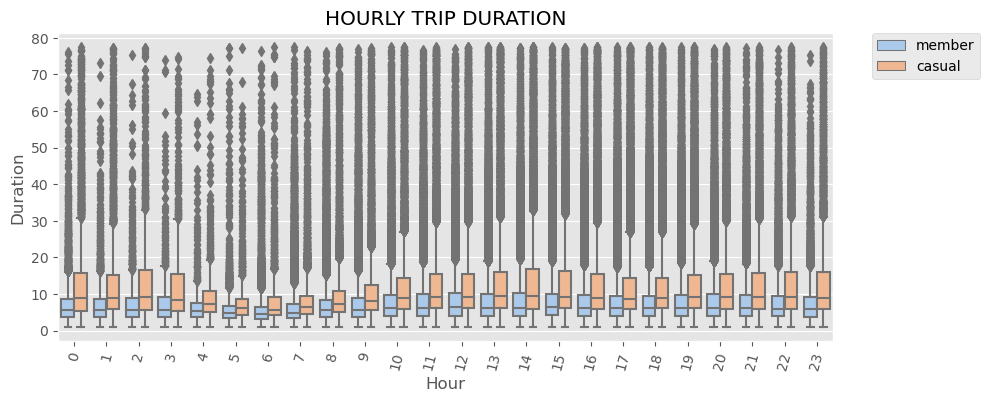

In [17]:
### Box Plot

#size of line graph
plt.figure(figsize = (10,4))

#create line graph
sns.boxplot(data=geo_df, x='starttime', y='tripduration',
            hue='member_casual',hue_order=['member','casual'],palette='pastel')

#title of the graph
plt.title('HOURLY TRIP DURATION')

#label of graph
plt.xlabel('Hour')
plt.ylabel('Duration')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#set axis
#plt.ylim((0,50))
plt.xticks(rotation = 75)

#display the graph
plt.show()